In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
import os

% aspiics_getector.get_nlcorr:  using file calibration-data/calibration_data_20241205000000/detector_nonlin.fits,
    which is a transfer function from [DN] to [DN]. We need [electron] to [electron], thus we need to convert by dividing by gain.


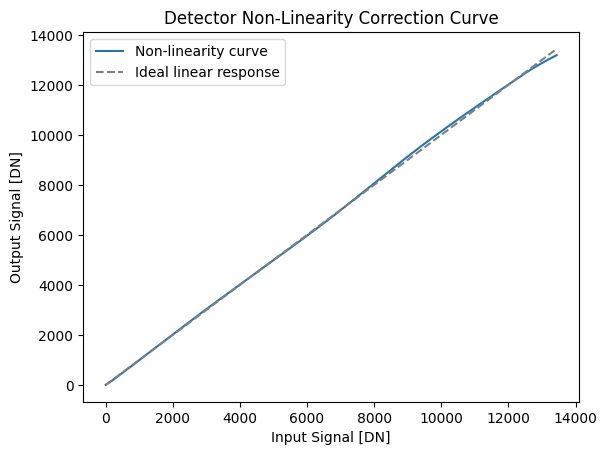

max input DN: 13436.287109375, max output DN: 13186.0107421875


In [6]:
filename="calibration-data/calibration_data_20241205000000/detector_nonlin.fits" #"./calibration_r/detector_nonlin.fits"

version_msg = "aspiics_detector.get_nlcorr() v1.0 with "+os.path.basename(filename)

print("% aspiics_getector.get_nlcorr:  using file "+filename+",")
with fits.open(filename, do_not_scale_image_data=True) as hdul:             
    response  = hdul[0].data
    nl_header = hdul[0].header
    
print("    which is a transfer function from ["+nl_header['UNITS']+"] to ["+nl_header['UNITS']+"]. We need [electron] to [electron],", end="")
if nl_header['UNITS'].find("electron") != -1:
    print(" thus no conversion is needed.")
    x = response[0,:]*0.100
    y = response[1,:]*0.100
else:
    print(" thus we need to convert by dividing by gain.") 
    x = response[0,:]
    y = response[1,:]

plt.plot(x, y, label='Non-linearity curve')

#add line y=x for reference
plt.plot(x, x, linestyle='--', color='gray', label='Ideal linear response')
plt.legend()

plt.xlabel('Input Signal [DN]')
plt.ylabel('Output Signal [DN]')

plt.title('Detector Non-Linearity Correction Curve')
plt.show()

print(f"max input DN: {x.max()}, max output DN: {y.max()}")